In [1]:
from __future__ import print_function

In [2]:
import os
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2021-11-18 10:19:04.539634: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14505944016705443036
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10545899776
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3805931527036973301
physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:08:00.0, compute capability: 7.5"
]


2021-11-18 10:19:06.029172: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-18 10:19:06.031314: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-18 10:19:06.070873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-18 10:19:06.071462: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:08:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.6

In [3]:
# Liberies
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
import re
import sys
import pandas as pd
import numpy as np
import string

In [5]:
# statistics
from scipy import sparse, stats

In [6]:
# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_selection import chi2
import chardet
from collections import Counter
import itertools

In [7]:
# Plot
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
# display plots inline
%matplotlib inline

In [8]:
sns.set_style("whitegrid")
import altair as alt

In [9]:
# scikit-sklearn
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, make_scorer, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold

from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder,MultiLabelBinarizer
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import gensim
import scikitplot.plotters as skplt

ModuleNotFoundError: No module named 'smart_open'

In [10]:
# deep learning libraries
from tensorflow import keras
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, Callback,CSVLogger
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, Callback,CSVLogger

AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'tf2'

In [ ]:
# Load dataset
source_dir ='/home/abbey/abbey/dataset/authorship/movie/'

In [ ]:
data = pd.read_csv(source_dir + 'Newcleanimbd62.csv', encoding="utf-8")
data =  data.sample(len(data), random_state=1)
data = data[data['content'].isnull()==False] 
data.dropna(subset=['content'], inplace=True)
data.dropna(subset=['userId'], inplace=True)
data.head(3)

In [ ]:
len(data.userId.unique()), len(data.content.unique())

In [11]:
import time

In [12]:
from collections import Counter

try:
    from typing import Dict, Iterable, Callable, List, Any, Iterator
except ImportError:
    pass

from nltk.tokenize import wordpunct_tokenize
from tqdm import tqdm
import toolz
import json

DEFAULT_EOW = '__eow'
DEFAULT_SOW = '__sow'
DEFAULT_UNK = '__unk'
DEFAULT_PAD = '__pad'

class Encoder:
    """ Encodes white-space separated text using byte-pair encoding.  See https://arxiv.org/abs/1508.07909 for details.
    """

    def __init__(self, vocab_size=8192, pct_bpe=0.2, word_tokenizer=None,
                 silent=True, ngram_min=2, ngram_max=2, required_tokens=None, strict=False, 
                 EOW=DEFAULT_EOW, SOW=DEFAULT_SOW, UNK=DEFAULT_UNK, PAD=DEFAULT_PAD):
        if vocab_size < 1:
            raise ValueError('vocab size must be greater than 0.')

        self.EOW = EOW
        self.SOW = SOW
        self.eow_len = len(EOW)
        self.sow_len = len(SOW)
        self.UNK = UNK
        self.PAD = PAD
        self.required_tokens = list(set(required_tokens or []).union({self.UNK, self.PAD}))
        self.vocab_size = vocab_size
        self.pct_bpe = pct_bpe
        self.word_vocab_size = max([int(vocab_size * (1 - pct_bpe)), len(self.required_tokens or [])])
        self.bpe_vocab_size = vocab_size - self.word_vocab_size
        self.word_tokenizer = word_tokenizer if word_tokenizer is not None else wordpunct_tokenize
        self.custom_tokenizer = word_tokenizer is not None
        self.word_vocab = {}  # type: Dict[str, int]
        self.bpe_vocab = {}  # type: Dict[str, int]
        self.inverse_word_vocab = {}  # type: Dict[int, str]
        self.inverse_bpe_vocab = {}  # type: Dict[int, str]
        self._progress_bar = iter if silent else tqdm
        self.ngram_min = ngram_min
        self.ngram_max = ngram_max
        self.strict = strict

    def mute(self):
        """ Turn on silent mode """
        self._progress_bar = iter

    def unmute(self):
        """ Turn off silent mode """
        self._progress_bar = tqdm

    def byte_pair_counts(self, words):
        # type: (Encoder, Iterable[str]) -> Iterable[Counter]
        """ Counts space separated token character pairs:
            [('T h i s </w>', 4}] -> {'Th': 4, 'hi': 4, 'is': 4}
        """
        for token, count in self._progress_bar(self.count_tokens(words).items()):
            bp_counts = Counter()  # type: Counter
            for ngram in token.split(' '):
                bp_counts[ngram] += count
            for ngram_size in range(self.ngram_min, min([self.ngram_max, len(token)]) + 1):
                ngrams = [''.join(ngram) for ngram in toolz.sliding_window(ngram_size, token.split(' '))]

                for ngram in ngrams:
                    bp_counts[''.join(ngram)] += count

            yield bp_counts

    def count_tokens(self, words):
        # type: (Encoder, Iterable[str]) -> Dict[str, int]
        """ Count tokens into a BPE vocab """
        token_counts = Counter(self._progress_bar(words))
        return {' '.join(token): count for token, count in token_counts.items()}

    def learn_word_vocab(self, sentences):
        # type: (Encoder, Iterable[str]) -> Dict[str, int]
        """ Build vocab from self.word_vocab_size most common tokens in provided sentences """
        word_counts = Counter(word for word in toolz.concat(map(self.word_tokenizer, sentences)))
        for token in set(self.required_tokens or []):
            word_counts[token] = int(2**63)
        sorted_word_counts = sorted(word_counts.items(), key=lambda p: -p[1])
        return {word: idx for idx, (word, count) in enumerate(sorted_word_counts[:self.word_vocab_size])}

    def learn_bpe_vocab(self, words):
        # type: (Encoder, Iterable[str]) -> Dict[str, int]
        """ Learns a vocab of byte pair encodings """
        vocab = Counter()  # type: Counter
        for token in {self.SOW, self.EOW}:
            vocab[token] = int(2**63)
        for idx, byte_pair_count in enumerate(self.byte_pair_counts(words)):
            for byte_pair, count in byte_pair_count.items():
                vocab[byte_pair] += count

            if (idx + 1) % 10000 == 0:
                self.trim_vocab(10 * self.bpe_vocab_size, vocab)

        sorted_bpe_counts = sorted(vocab.items(), key=lambda p: -p[1])[:self.bpe_vocab_size]
        return {bp: idx + self.word_vocab_size for idx, (bp, count) in enumerate(sorted_bpe_counts)}

    def fit(self, text):
        # type: (Encoder, Iterable[str]) -> None
        """ Learn vocab from text. """
        _text = [l.lower().strip() for l in text]

        # First, learn word vocab
        self.word_vocab = self.learn_word_vocab(_text)

        remaining_words = [word for word in toolz.concat(map(self.word_tokenizer, _text))
                           if word not in self.word_vocab]
        self.bpe_vocab = self.learn_bpe_vocab(remaining_words)

        self.inverse_word_vocab = {idx: token for token, idx in self.word_vocab.items()}
        self.inverse_bpe_vocab = {idx: token for token, idx in self.bpe_vocab.items()}

    @staticmethod
    def trim_vocab(n, vocab):
        # type: (int, Dict[str, int]) -> None
        """  Deletes all pairs below 10 * vocab size to prevent memory problems """
        pair_counts = sorted(vocab.items(), key=lambda p: -p[1])
        pairs_to_trim = [pair for pair, count in pair_counts[n:]]
        for pair in pairs_to_trim:
            del vocab[pair]

    def subword_tokenize(self, word):
        # type: (Encoder, str) -> List[str]
        """ Tokenizes inside an unknown token using BPE """
        end_idx = min([len(word), self.ngram_max])
        sw_tokens = [self.SOW]
        start_idx = 0

        while start_idx < len(word):
            subword = word[start_idx:end_idx]
            if subword in self.bpe_vocab:
                sw_tokens.append(subword)
                start_idx = end_idx
                end_idx = min([len(word), start_idx + self.ngram_max])
            elif len(subword) == 1:
                sw_tokens.append(self.UNK)
                start_idx = end_idx
                end_idx = min([len(word), start_idx + self.ngram_max])
            else:
                end_idx -= 1

        sw_tokens.append(self.EOW)
        return sw_tokens

    def tokenize(self, sentence):
        # type: (Encoder, str) -> List[str]
        """ Split a sentence into word and subword tokens """
        word_tokens = self.word_tokenizer(sentence.lower().strip())

        tokens = []
        for word_token in word_tokens:
            if word_token in self.word_vocab:
                tokens.append(word_token)
            else:
                tokens.extend(self.subword_tokenize(word_token))

        return tokens
    def transform(self, sentences, reverse=False, fixed_length=None):
        # type: (Encoder, Iterable[str], bool, int) -> Iterable[List[int]]
        """ Turns space separated tokens into vocab idxs """
        direction = -1 if reverse else 1
        for sentence in self._progress_bar(sentences):
            encoded = []
            tokens = list(self.tokenize(sentence.lower().strip()))
            for token in tokens:
                if token in self.word_vocab:
                    encoded.append(self.word_vocab[token])
                elif token in self.bpe_vocab:
                    encoded.append(self.bpe_vocab[token])
                else:
                    encoded.append(self.word_vocab[self.UNK])

            if fixed_length is not None:
                encoded = encoded[:fixed_length]
                while len(encoded) < fixed_length:
                    encoded.append(self.word_vocab[self.PAD])

            yield encoded[::direction]

In [ ]:
data = data.sample(frac=1)

In [ ]:
data.head(2)

In [ ]:
len(data.userId.unique()), len(data.content.unique())

# Split data to train and test

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# save the train and test file
# again using the '\t' separator to create tab-separated-values files
train.to_csv(source_dir+ 'train.csv', index=False)
test.to_csv(source_dir+'test.csv',index=False)

In [13]:
# Load 
data_dir ='/home/abbey/abbey/dataset/authorship/movie/'
train = pd.read_csv(data_dir + "train.csv")
test = pd.read_csv(data_dir + "test.csv")
print("Lengths Train/Test: {} / {}".format(len(train),len(test)))

Lengths Train/Test: 49578 / 12395


In [14]:
train = train.sample(frac=1)

In [15]:
train.head(2)

,reviewId,userId,content
32538,504332,rogerrbert,The Christmas Tale takes place somewhere in ...
18070,484345,theorobertson,It's a well made and constructed movie that en...


In [16]:
def fit_encoder(encoder,corpus):
    start = time.time()
    encoder.fit(corpus)
    print("Encoder trained: "+str(int(time.time() - start))+"s")

In [17]:
list_sentences_train = train["content"].fillna("__empty__").values
list_sentences_test = test["content"].fillna("__empty__").values

In [18]:
vocabulary = 50000
encoder = Encoder(vocabulary, ngram_max=10)
corpus = list_sentences_train
fit_encoder(encoder,corpus)

Encoder trained: 18s


In [19]:
list_tokenized_train = list(encoder.transform(list_sentences_train))
list_tokenized_test = list(encoder.transform(list_sentences_test))

In [20]:
print(len(list_tokenized_train))

49578


In [21]:
cutout_percentile = 99.0

In [22]:
sizes = [len(x) for x in list_tokenized_train + list_tokenized_test]
max_size = int(np.percentile(sizes,cutout_percentile))

In [23]:
print(max_size)

1161


In [24]:
len(list_tokenized_test)==0

False

In [25]:
maxT =  max(list_tokenized_train)
print(maxT)
maxTs =  max(list_tokenized_test)
print(maxTs)

[40000, 49922, 42279, 40351, 40001, 435, 17, 1878, 22, 1268, 5956, 21, 11, 7309, 5, 2673, 23, 35866, 22, 8484, 10540, 21, 34, 26, 46, 60, 1081, 29, 10235, 7, 41, 10920, 3973, 22, 1645, 369, 21, 3, 63, 944, 11, 2, 71, 7, 104, 35866, 1185, 53, 273, 74, 59, 4834, 63, 52, 11, 164, 9, 101, 56, 12, 4, 4, 4, 40000, 9842, 271, 40001, 3, 670, 15, 443, 74, 353, 31, 4144, 369, 19, 8, 245, 441, 9, 383, 18, 1927, 382, 17, 19, 124, 8, 30, 77, 280, 9, 141, 56, 40000, 49922, 42279, 40351, 40001, 2008, 432, 757, 1643, 70, 15038, 18, 1255, 127, 1158, 80, 11, 1901, 4, 2, 307, 31, 4144, 74, 1645, 369, 11, 725, 723, 9, 39, 415, 29, 2, 2862, 625, 7216, 3, 69, 9, 39, 639, 19, 215, 8, 30, 89, 12, 25, 17, 37, 1544, 114, 2321, 7, 7216, 33, 4102, 4, 1790, 8, 30, 47, 1150, 9, 39, 233, 1741, 2333, 68, 215, 8, 30, 5, 20776, 431, 73, 5, 3672, 54, 162, 68, 567, 816, 7, 63, 595, 46, 127, 2350, 9, 7216, 74, 66, 12, 120, 12, 8, 13, 11, 3902, 6705, 4, 38, 76, 60, 121, 1179, 311, 198, 40000, 49922, 42279, 40351, 40001, 12

In [26]:
maxT =  max( [max(x) for x in list_tokenized_train]) + 1
print(maxT)

50000


In [27]:
max_features = max([max(x) for x in list_tokenized_train+list_tokenized_test])+1

In [28]:
print("Vocabulary: {}, Max Entry Size: {}".format(max_features,max_size))

Vocabulary: 50000, Max Entry Size: 1161


In [29]:
x_train = sequence.pad_sequences(list_tokenized_train, maxlen=max_size)
x_test = sequence.pad_sequences(list_tokenized_test, maxlen=max_size)

# Custom Callback

In [30]:
class PlotModel(Callback):
    def set_params_(self, model_type, checkpoint_path, dataset, 
                   batch_size, plot_per_batch,
                   dictionary_size, max_review_length, 
                   best_model_monitor, early_stop_monitor):
        self.path = checkpoint_path
        self.model_type = model_type
        self.dataset = dataset
        self.batch_size = batch_size
        self.dictionary_size = dictionary_size
        self.max_review_length = max_review_length
        self.best_model_monitor = best_model_monitor
        self.early_stop_monitor = early_stop_monitor
        self.plot_per_batch = plot_per_batch
    
    def get_monitor_ticks(self):
        if self.best_model_monitor == "val_acc":
            bm_ind = np.argmax(self.val_acc)
        else:
            bm_ind = np.argmin(self.val_losses)
        
        if self.early_stop_monitor == "val_acc":
            es_ind = np.argmax(self.val_acc)
        else:
            es_ind = np.argmin(self.val_losses)
        return [bm_ind, es_ind]
    
    def plot(self, save):
        clear_output(wait=True)
        fig = plt.figure()
        plt.grid(True)
        plt.plot(self.x, self.acc, '--', label="acc")
        plt.plot(self.x, self.val_acc, label="val_acc")
        plt.plot(self.x, self.losses, '--', label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        bm_ind, es_ind = self.get_monitor_ticks()
        plt.axvline(x=self.x[bm_ind],alpha=0.6,color="green", linestyle='--')
        plt.axvline(x=self.x[es_ind],alpha=0.6,color="red", linestyle='--')
        title = "{}: accuracy & loss for {} (length:{}, val acc/loss: {:.4f}/{:.4f})"
        title = title.format(self.model_type,self.dataset,self.max_review_length,max(self.val_acc),min(self.val_losses))
        plt.title(title)
        plt.legend(['acc: train', 'acc: validation','loss: train', 'loss: validation'], loc='upper left')
        plt.show()
        if save:
            fig.savefig(self.path+"-figure.png")
            
    def on_train_begin(self, logs={}):
        self.i = 1
        self.x = [0]
        self.acc = [0]
        self.val_acc = [0]
        self.losses = [1]
        self.val_losses = [1]
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        if 'acc' in logs  and 'loss' in logs:
            self.logs.append(logs)
            self.x.append(self.i)
            self.acc.append(logs.get('acc'))
            self.losses.append(logs.get('loss'))
            if "val_acc" in logs and "val_loss" in logs:
                self.val_acc.append(logs.get('val_acc'))
                self.val_losses.append(logs.get('val_loss'))
            else:
                self.val_acc.append(self.val_acc[len(self.val_acc)-1])
                self.val_losses.append(self.val_losses[len(self.val_losses)-1])
            self.i += 1
            self.plot(False)
        else:
            keys = []
            for k in ['acc', 'val_acc', 'loss', 'val_loss']:
                if k not in logs:
                    keys.append(k)
            print(("Missing parameters",keys,logs))
    
    def on_batch_end(self, batch, logs={}):
        if batch%self.plot_per_batch != 0:
            return
        else:
            self.on_epoch_end(batch, logs)
    
    def on_train_end(self, epoch, logs={}):
        self.plot(True)

# Deep learning model 
  * LSTM with Byte-pair encoding

In [36]:
num_of_classes = 60
optimizer = 'adam'
loss = 'categorical_crossentropy'
embed_size = 128

batch_size = 64
epochs = 10
es_patience = 5

In [32]:
def get_lstm():
    embed_size = 128
    inp = Input(shape=(max_size, ))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(LSTM(50, return_sequences=True))(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(num_of_classes, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])  

    return model

In [34]:
model = get_lstm()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1161)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1161, 128)         6400000   
_________________________________________________________________
bidirectional (Bidirectional (None, 1161, 100)         71600     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)               

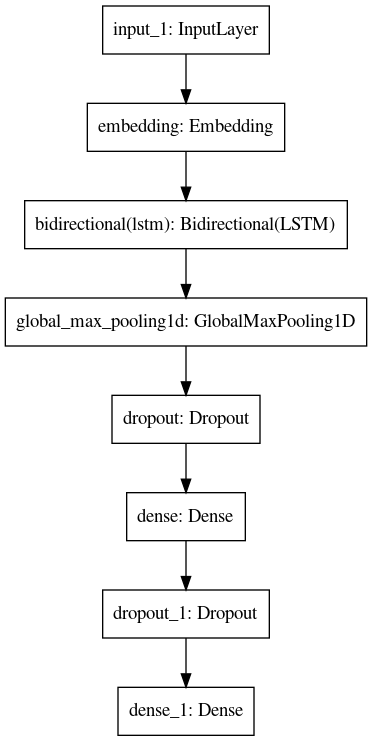

In [35]:
tf.keras.utils.plot_model(model)

In [37]:
model_type = "lstm"
file_path=model_type+".weights_base.best.hdf5"

In [38]:
number_of_plots = 200
number_of_batches_per_epoch = len(x_train)/batch_size
plot_per_batch = int(number_of_batches_per_epoch/(number_of_plots/epochs))
if plot_per_batch == 0:
    plot_per_batch = 1
plot_per_batch

38

In [ ]:
plotter = PlotModel()
plotter.set_params_(model_type, model_type+"-checkpoint-path", "bpe-{}k".format(int(vocabulary/1000)), 
                   batch_size, plot_per_batch,
                   vocabulary, max_size, 
                   'val_loss', 'val_loss')

checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
earlyStopping = EarlyStopping(monitor="val_loss", mode="max", patience=es_patience)
callbacks_list = [plotter, checkpoint, earlyStopping]